/var/folders/38/qgw_y07j40z5xz5ft6dtsd800000gn/T/ipykernel_27844/1491667199.py:25: RuntimeWarning: invalid value encountered in cast
  inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Comparing original, and compressed flower image at 100 principal component:


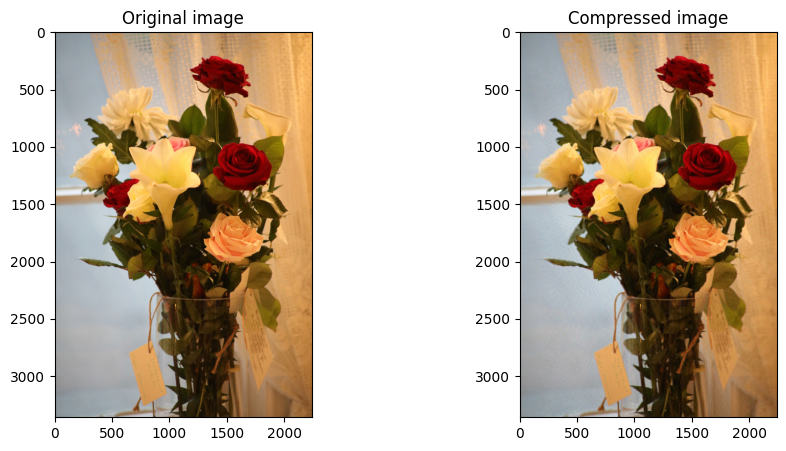

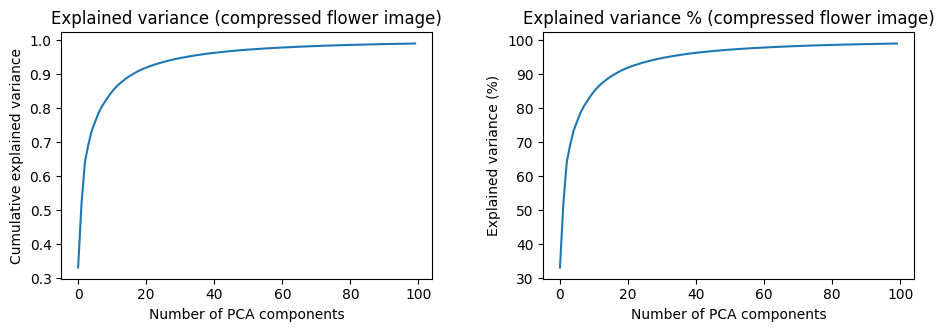

/var/folders/38/qgw_y07j40z5xz5ft6dtsd800000gn/T/ipykernel_27844/1491667199.py:76: RuntimeWarning: invalid value encountered in cast
  inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Comparing original, and compressed black-white dice image at 70 principal component:


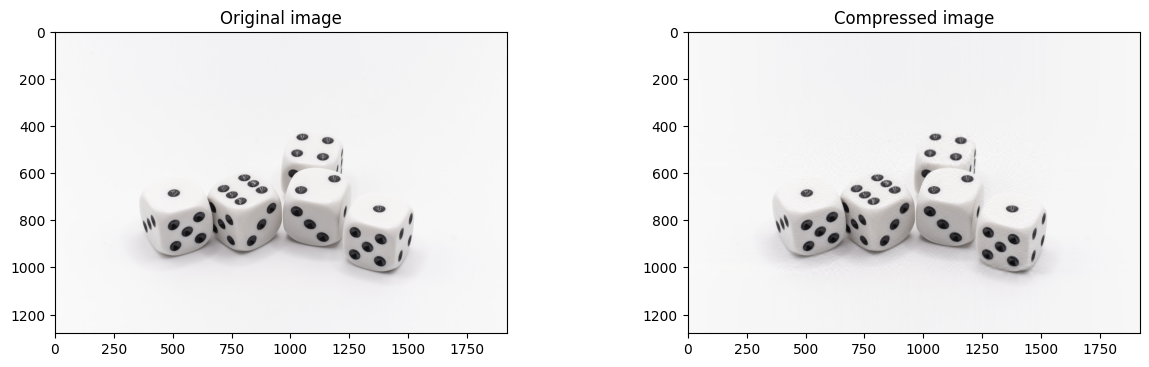

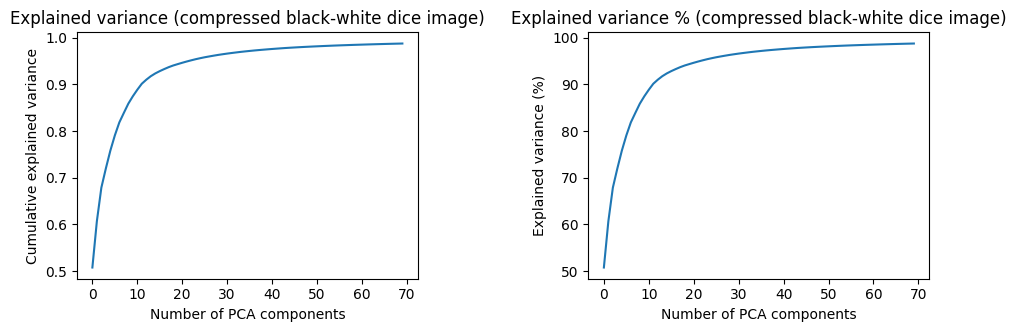

/var/folders/38/qgw_y07j40z5xz5ft6dtsd800000gn/T/ipykernel_27844/1491667199.py:126: RuntimeWarning: invalid value encountered in cast
  inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Comparing original, and compressed color dice image at 120 principal component:


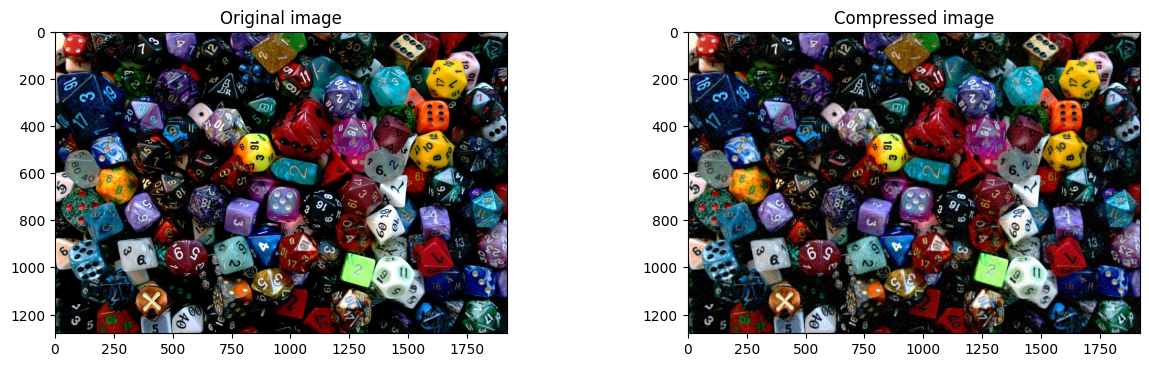

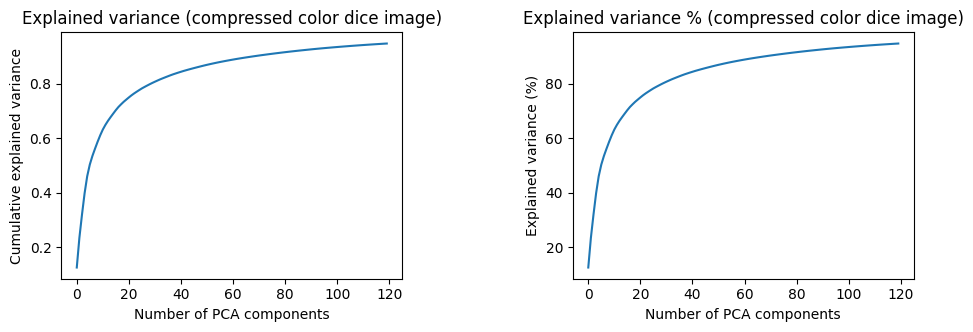

/var/folders/38/qgw_y07j40z5xz5ft6dtsd800000gn/T/ipykernel_27844/1491667199.py:176: RuntimeWarning: invalid value encountered in cast
  inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Comparing original, and compressed face image at 70 principal component:


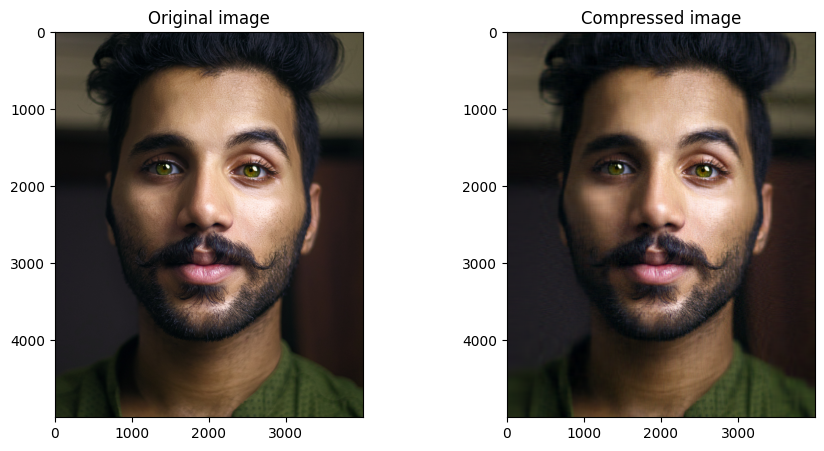

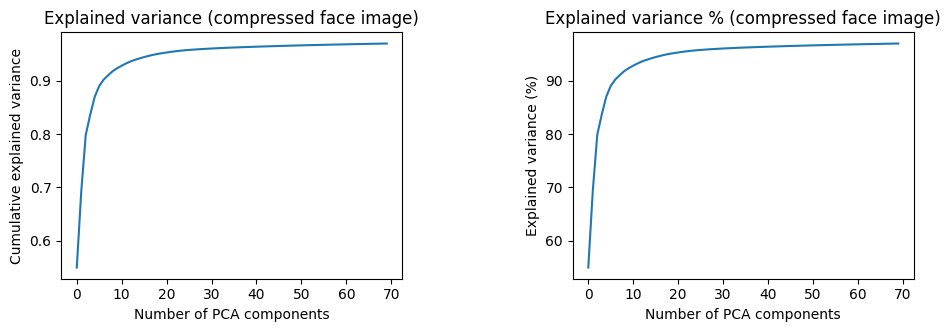

In [2]:
#Reflections about this task is in markdown below. 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2

def flower_image_processing(image):
    raw_image = image
    blue,green,red = cv2.split(raw_image) # this divids the colors into green, red and blue (RGB)

    # then perform PCA analysis
    pca_value = 100
    pca = PCA(pca_value)

    # Next, I apply first PCA transform to each of the RGB colors, and also the inverse transform to go back to reduced image
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32) 

    #show color info for compressed image
    print("Comparing original, and compressed flower image at", pca_value, "principal component:")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    plt.subplots_adjust(wspace = 0.5)
    ax1.imshow(raw_image)
    ax1.set_title('Original image')

    ax2.imshow(inverted_image)
    ax2.set_title('Compressed image')
    plt.show()

    explained_variance = pca.explained_variance_ratio_  # Here I collect the explained variance of each component

    # I generate component indices here. This did not affect the explained variance visualization.
    #components = [i for i in range(0, len(explained_variance))]

    # Explained variance in percentage
    explained_variance_percent = [100 * i for i in explained_variance]
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (11,3.2))
    plt.subplots_adjust(wspace = 0.3)
    ax1.plot(np.cumsum(explained_variance))
    ax1.set_title('Explained variance (compressed flower image)')
    ax1.set_ylabel('Cumulative explained variance')
    ax1.set_xlabel('Number of PCA components')

    ax2.plot(np.cumsum(explained_variance_percent))
    ax2.set_title('Explained variance % (compressed flower image)')
    ax2.set_ylabel('Explained variance (%)')
    ax2.set_xlabel('Number of PCA components')
    plt.show()

def BlackWhite_diceImage_compression(image):
    raw_image = image
    blue,green,red = cv2.split(raw_image) # this divids the colors into green, red and blue (RGB)

    # then perform PCA analysis
    pca_value = 70
    pca = PCA(pca_value)

    # Next, I apply first PCA transform to each of the RGB colors, and also the inverse transform to go back to reduced image
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32) 

    #show color info for compressed image
    print()
    print("Comparing original, and compressed black-white dice image at", pca_value, "principal component:")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,7))
    plt.subplots_adjust(wspace = 0.4)
    ax1.imshow(raw_image)
    ax1.set_title('Original image')

    ax2.imshow(inverted_image)
    ax2.set_title('Compressed image')
    plt.show()

    explained_variance = pca.explained_variance_ratio_  # Here I collect the explained variance of each component

    # Explained variance in percentage
    explained_variance_percent = [100 * i for i in explained_variance]
    #print("Explained variance of principal component:")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (11,3.2))
    plt.subplots_adjust(wspace = 0.5)
    ax1.plot(np.cumsum(explained_variance))
    ax1.set_title('Explained variance (compressed black-white dice image)')
    ax1.set_ylabel('Cumulative explained variance')
    ax1.set_xlabel('Number of PCA components')

    ax2.plot(np.cumsum(explained_variance_percent))
    ax2.set_title('Explained variance % (compressed black-white dice image)')
    ax2.set_ylabel('Explained variance (%)')
    ax2.set_xlabel('Number of PCA components')
    plt.show()

def color_diceImage_compression(image):
    raw_image = image
    blue,green,red = cv2.split(raw_image) # this divids the colors into green, red and blue (RGB)

    # then perform PCA analysis
    pca_value = 120
    pca = PCA(pca_value)

    # Next, I apply first PCA transform to each of the RGB colors, and also the inverse transform to go back to reduced image
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32) 

    #show color info for compressed image
    print()
    print("Comparing original, and compressed color dice image at", pca_value, "principal component:")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,7))
    plt.subplots_adjust(wspace = 0.4)
    ax1.imshow(raw_image)
    ax1.set_title('Original image')

    ax2.imshow(inverted_image)
    ax2.set_title('Compressed image')
    plt.show()

    explained_variance = pca.explained_variance_ratio_  # Here I collect the explained variance of each component

    # Explained variance in percentage
    explained_variance_percent = [100 * i for i in explained_variance]
    #print("Explained variance of principal component:")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (11,3.2))
    plt.subplots_adjust(wspace = 0.5)
    ax1.plot(np.cumsum(explained_variance))
    ax1.set_title('Explained variance (compressed color dice image)')
    ax1.set_ylabel('Cumulative explained variance')
    ax1.set_xlabel('Number of PCA components')

    ax2.plot(np.cumsum(explained_variance_percent))
    ax2.set_title('Explained variance % (compressed color dice image)')
    ax2.set_ylabel('Explained variance (%)')
    ax2.set_xlabel('Number of PCA components')
    plt.show()

def FaceImage_compression(image):
    raw_image = image
    blue,green,red = cv2.split(raw_image) # this divids the colors into green, red and blue (RGB)

    # then perform PCA analysis
    pca_value = 70
    pca = PCA(pca_value)

    # Next, I apply first PCA transform to each of the RGB colors, and also the inverse transform to go back to reduced image
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)

    inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted ))).astype(np.uint32) 

    #show color info for compressed image
    print()
    print("Comparing original, and compressed face image at", pca_value, "principal component:")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    plt.subplots_adjust(wspace = 0.4)
    ax1.imshow(raw_image)
    ax1.set_title('Original image')

    ax2.imshow(inverted_image)
    ax2.set_title('Compressed image')
    plt.show()

    explained_variance = pca.explained_variance_ratio_  # Here I collect the explained variance of each component

    # Explained variance in percentage
    explained_variance_percent = [100 * i for i in explained_variance]
    #print("Explained variance of principal component:")
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (11,3.2))
    plt.subplots_adjust(wspace = 0.5)
    ax1.plot(np.cumsum(explained_variance))
    ax1.set_title('Explained variance (compressed face image)')
    ax1.set_ylabel('Cumulative explained variance')
    ax1.set_xlabel('Number of PCA components')

    ax2.plot(np.cumsum(explained_variance_percent))
    ax2.set_title('Explained variance % (compressed face image)')
    ax2.set_ylabel('Explained variance (%)')
    ax2.set_xlabel('Number of PCA components')
    plt.show()

flower_image = plt.imread('flower2.jpg') 
flower_image = cv2.rotate(flower_image, cv2.ROTATE_90_COUNTERCLOCKWISE)
dice_image1 = plt.imread('dice_black_and_white.jpg') 
dice_image2 = plt.imread('dice-multiple_color.jpg')
face_image = plt.imread('face.jpg')

flower_image_processing(flower_image)
BlackWhite_diceImage_compression(dice_image1)
color_diceImage_compression(dice_image2)
FaceImage_compression(face_image)


Color information of original image:


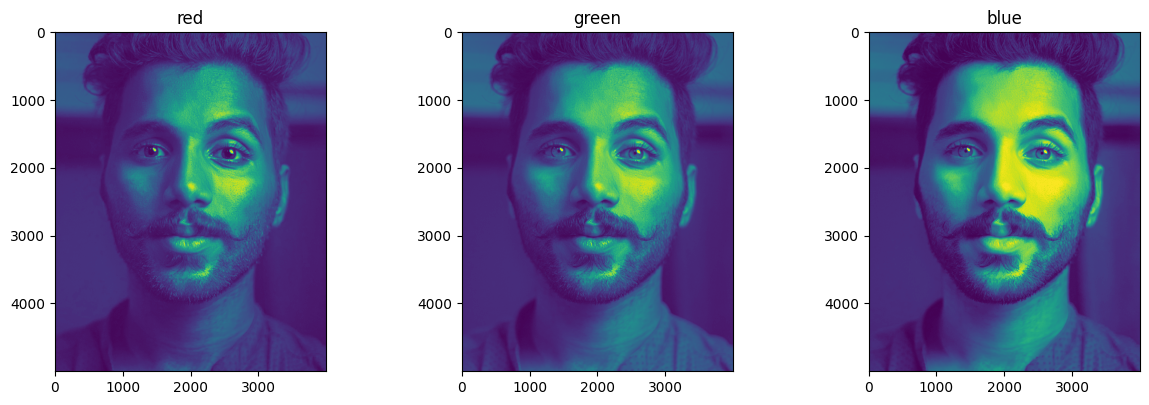

/var/folders/38/qgw_y07j40z5xz5ft6dtsd800000gn/T/ipykernel_27844/1487592851.py:35: RuntimeWarning: invalid value encountered in cast
  inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint32)


Color information of compressed image:


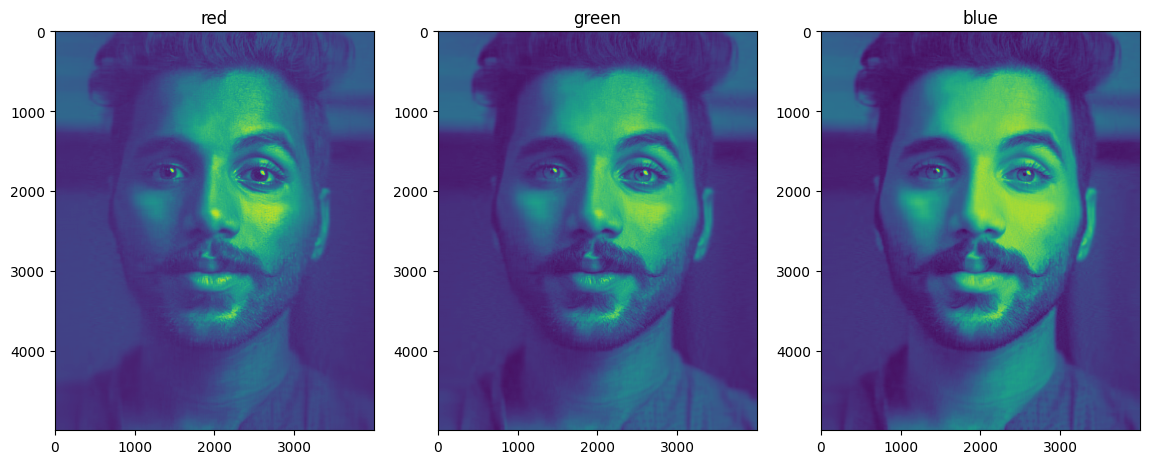

In [3]:
# Here I display and compare individual colors of original and compressed images. Photo used was a random photo from the internet.

#I first split the different colors to RGB
#blue,green,red = cv2.split(flower_image)
#blue,green,red = cv2.split(dice_image1) 
#blue,green,red = cv2.split(dice_image2)
blue,green,red = cv2.split(face_image)  


#show color info for original image
print("Color information of original image:")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 7))
plt.subplots_adjust(wspace = 0.5)
ax1.imshow(red)
ax1.set_title('red')
ax2.imshow(green)
ax2.set_title('green')
ax3.imshow(blue)
ax3.set_title('blue')
plt.show()

# then perform PCA analysis
pca_component = 70
pca = PCA(pca_component)

red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
    
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
    
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

inverted_image = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint32) 

#show color info for compressed image
print("Color information of compressed image:")
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 7))
plt.subplots_adjust(wspace = 0.2)
ax1.imshow(red_inverted)
ax1.set_title('red')
ax2.imshow(green_inverted)
ax2.set_title('green')
ax3.imshow(blue_inverted)
ax3.set_title('blue')
plt.show()

Answers to the questions:

Question 1 - What is the typical number of principal components required to keep the sufficient image quality in each case?

Answer:
Typical number of principal component required to keep sufficient image quality varied, depending on the kind of image. Images with more color information required higher principal components to retain sufficient image quality. 
For the flower image, principal components was set at 100.
For the black-white dice image, principal components was set at 70.
For the color dice image, principal components was set at 120.
For the face image, principal components was set at 70.

Principal components numbers less than these stated above, introduces visible compression artifacts.  


Question 2 - How this corresponds to variance explained?

Answer: 
The number of principal components retained seem to be directly proportional to the explained variant. This means that as the principal component number increases, the explained variance also increases. This is also seen in the explained variance percentage visual. 


Question 3 - Are some particular colors or shapes difficult to compress?

Answer:
I noticed that images with more color details took longer time to process. This also mean that at least one color required  more processing. A little research on this suggests that color red seem to be the most difficult to compress. This might explain why the full-color dice image took longer to compress, as it required higher principal components number to retain sufficient quality. In the face and flower images, when I compared the individual color compression (using the same principal component number for each color), I noticed that color red was the least compressed.


Question 4 - Is this tool a sufficient method for decompression without losing significant amount of quality? 

Answer: 
I can argue that this tool is sufficient method for decompression without losing significant amount of quality, because the main determining factor of quality loss is the number of principal components. High enough numbers can produce decompressed images without significant loss of quality.